# Predicting using ML models for Heart Disease

This notebook looks into using python machine learning and data science libraries in order to build a model capable of predicting if someone has heart disease based on their medical attributes.

The following approach will be used:

1. Problem definition
2. Data
3. Evaluation Metrics
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, is it possible to predict whether or not they have heart disease.

## 2. Data
> The original data came from UCI repository. There is also a version of it available on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation Metrics

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of the concept,
we will pursue the project.

## 4. Features

This is where there is different information about each of the features in your data. You can do this by either reading the information below or using the link provided above.

> Data Dictionary
    1. age: age in years
    2. sex: sex (1 = male; 0 = female)
    3. cp: chest pain type
     * Value 1: typical angina
     * Value 2: atypical angina
     * Value 3: non-anginal pain
     * Value 4: asymptomatic
    4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    5. chol: serum cholestoral in mg/dl
    6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    7. restecg: resting electrocardiographic results
     * Value 0: normal
     * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    8. thalach: maximum heart rate achieved
    9. exang: exercise induced angina (1 = yes; 0 = no)
    10. oldpeak = ST depression induced by exercise relative to rest
    11. slope: the slope of the peak exercise ST segment
     * Value 1: upsloping
     * Value 2: flat
     * Value 3: downsloping
    12. ca: number of major vessels (0-3) colored by flourosopy
    13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    14. num: diagnosis of heart disease (angiographic disease status)
     * Value 0: < 50% diameter narrowing
     * Value 1: > 50% diameter narrowing

## Preparing the tools

We are going to use pandas, matplotlib and numpy for data manipulation and analysis.

In [124]:
# Import all tools needed

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evals
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

%matplotlib inline # plots appear in the notebook

UsageError: unrecognized arguments: # plots appear in the notebook


## Load Data

In [125]:
df = pd.read_csv("heart-disease.csv")
df.shape #( rows,columns)

(303, 14)

Data Exploration - In this section become familiar with the data, compare columns to each other. Aim is to become an expert
of the dataset and be able to relate to the target. 

1. What question are you solving
2. What kind of data do we have and how to treat different types of data
3. Whats missing from the data and how to deal with it?
4. Are there outliers in the datasets and how to deal with them?
5. How can you add, change or remove features to get more out of your data?

In [126]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


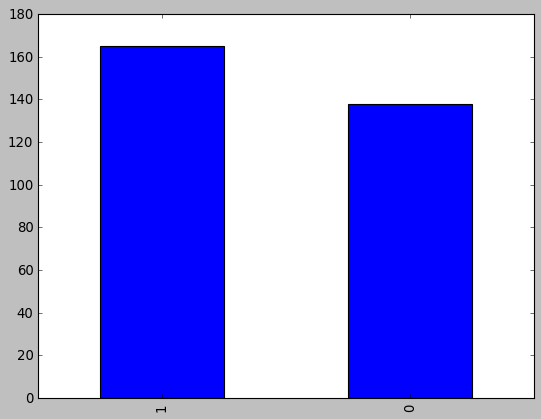

In [127]:
#Check how many classifications are there for our target column
plt.style.use("classic")
df["target"].value_counts().plot(kind="bar");

In [128]:
#Check if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [129]:
#What types of data exist in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [130]:
#Perform some statistical calculations on the numerical columns in order to find patterns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding Patterns in the data for analysis

### Heart Disease Frequency according to Sex 

In [131]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

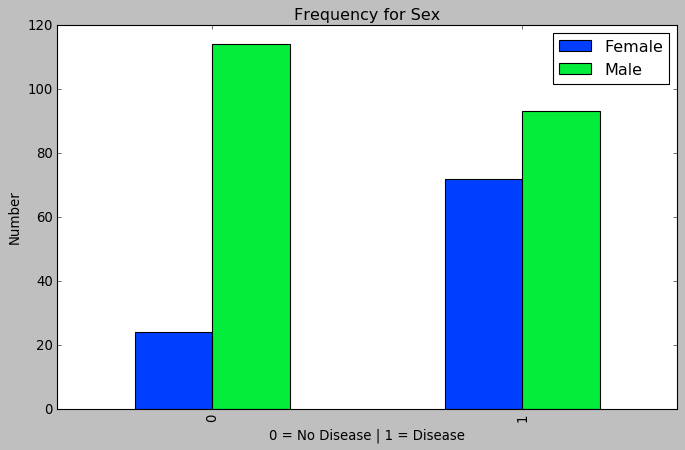

In [132]:
#Compare sex column to target column
plt.style.use("seaborn-bright")
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6))
#This data shows us that males are more likely to get heart disease.
plt.title("Frequency for Sex")
plt.xlabel("0 = No Disease | 1 = Disease")
plt.ylabel("Number")
plt.legend(["Female","Male"]);

The above data may show that males in general are more likely to have heart disease but what can be seen is that within this study
3 in 4 women have heart disease and roughly 4 in 10 for men as a fraction.

### Relationship of Age and Sex with Heart Disease *

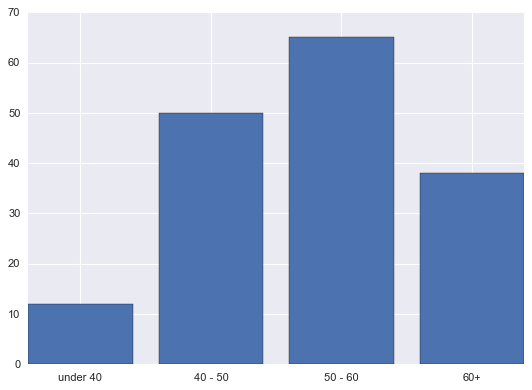

In [133]:
"""Here is my manual code on how to create buckets for age ranges in order to make an improved graph for the one above.
The code calculates the frequency of people with heart disease at certain age ranges and places them in a pre-defined
dictionary.
"""
age_frequency_for_target = {"under 40": 0, "40 - 50": 0, "50 - 60": 0, "60+": 0}
record=0
target_0=0
for age in df.age:
    if df.target[record] == 1:
        if age >= 0 and age < 40:
            age_frequency_for_target["under 40"] = age_frequency_for_target["under 40"] + 1
        if age >= 40 and age < 50:
            age_frequency_for_target["40 - 50"] = age_frequency_for_target["40 - 50"] + 1
        if age >= 50 and age < 60:
            age_frequency_for_target["50 - 60"] = age_frequency_for_target["50 - 60"] + 1
        if age >= 60:
            age_frequency_for_target["60+"] = age_frequency_for_target["60+"] + 1
    else:
        target_0 += 1
        
    record += 1
    
#Graph code
plt.style.use("seaborn")
plt.bar(age_frequency_for_target.keys(),age_frequency_for_target.values());

With the above graph it can be concluded that the older you are, the more likely you are to be positive with heart disease.

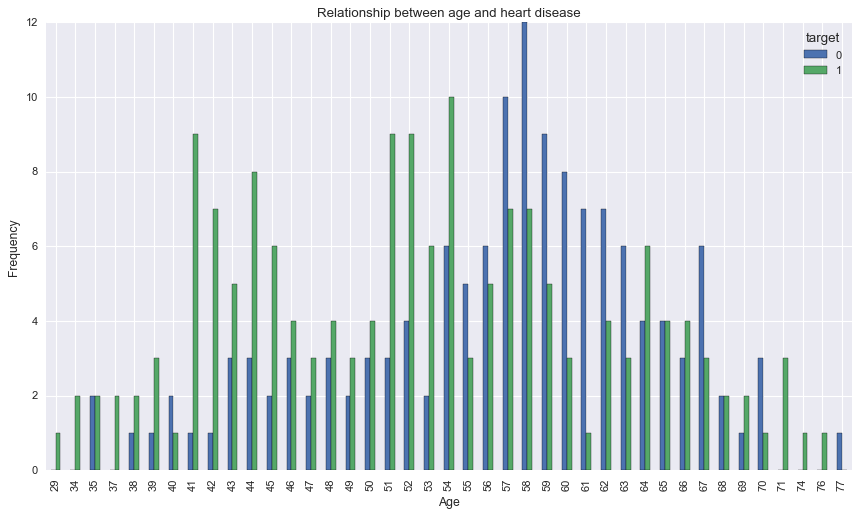

In [134]:
#Just an extra graph to emphasise the point but split up into different genders
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(13,7));
plt.title("Relationship between age and heart disease")
plt.ylabel("Frequency")
plt.xlabel("Age");

### Heart Disease Frequency per Chest Pain Type

cp: chest pain type
 * Value 1: typical angina
 * Value 2: atypical angina
 * Value 3: non-anginal pain
 * Value 4: asymptomatic

In [135]:
#Check the possible values that this column can take
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

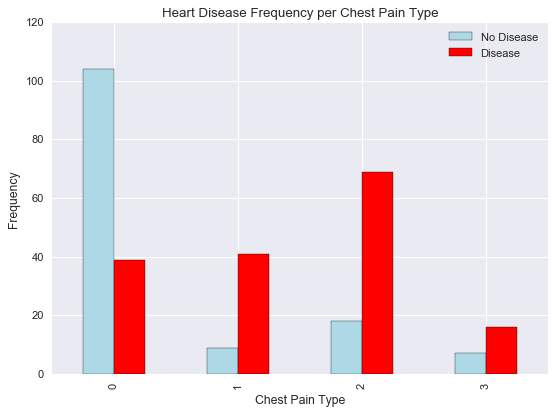

In [136]:
#Bar graph on 
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["lightblue","red"]);
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.legend(["No Disease","Disease"])
plt.ylabel("Frequency")
plt.xlabel("Chest Pain Type");

This graph suggests that chest pain types 1, 2 and 3 have a strong relationship to heart disease, more likely to cause it or have an effect, as opposed to type 0. 

### Relationship of cholestorol and age with heart disease*

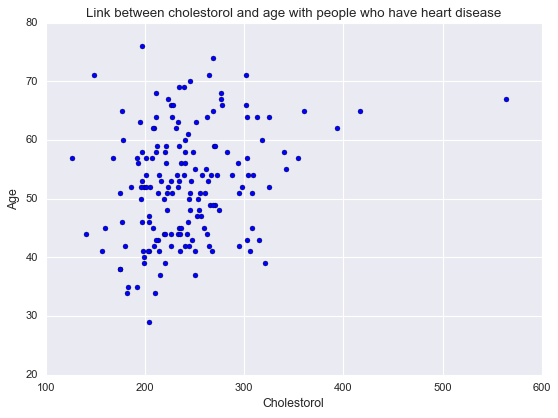

In [137]:
#Here is a general scatter graph
plt.scatter(df.chol[df.target == 1],df.age[df.target == 1])
plt.title("Link between cholestorol and age with people who have heart disease")
plt.xlabel("Cholestorol")
plt.ylabel("Age");

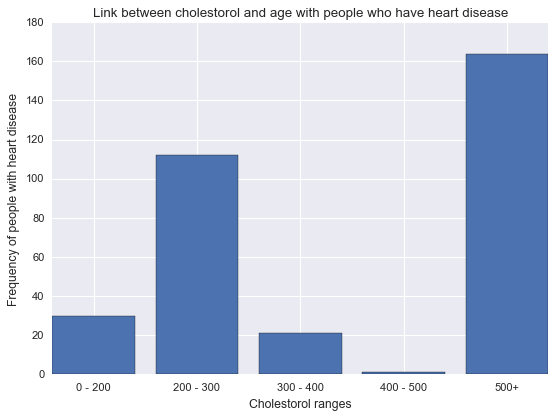

In [138]:
"""Here is my manual code on how to create buckets for chol ranges in order to make a bar graph.
The code calculates the frequency of people with heart disease at certain age ranges and places them in a pre-defined
dictionary.
"""
chol_frequency_for_target = {"0 - 200": 0, "200 - 300": 0, "300 - 400": 0, "400 - 500": 0, "500+": 0}
record=0
target_0=0
for chol in df.chol:
    if df.target[record] == 1:
        if chol >= 0 and chol < 200:
            chol_frequency_for_target["0 - 200"] = chol_frequency_for_target["0 - 200"] + 1
        if chol >= 200 and chol < 300:
            chol_frequency_for_target["200 - 300"] = chol_frequency_for_target["200 - 300"] + 1
        if chol >= 300 and chol < 400:
            chol_frequency_for_target["300 - 400"] = chol_frequency_for_target["300 - 400"] + 1
        if chol >= 400 and chol < 500:
            chol_frequency_for_target["400 - 500"] = chol_frequency_for_target["400 - 500"] + 1
        else:
            chol_frequency_for_target["500+"] = chol_frequency_for_target["500+"] + 1
    else:
        target_0 += 1
        
    record += 1
    
#Graph code
plt.style.use("seaborn")
plt.bar(chol_frequency_for_target.keys(),chol_frequency_for_target.values())
plt.xlabel("Cholestorol ranges")
plt.ylabel("Frequency of people with heart disease")
plt.title("Link between cholestorol and age with people who have heart disease");

Though the above graph does not show a completely clear relationship between cholestorol and frequency of people getting
heart disease. It can be clearly seen that a large proportion of people that have had heart disease had either a cholestorol
range between 200-300 or over 500.

### Age vs Max Heart Rate for Heart Disease

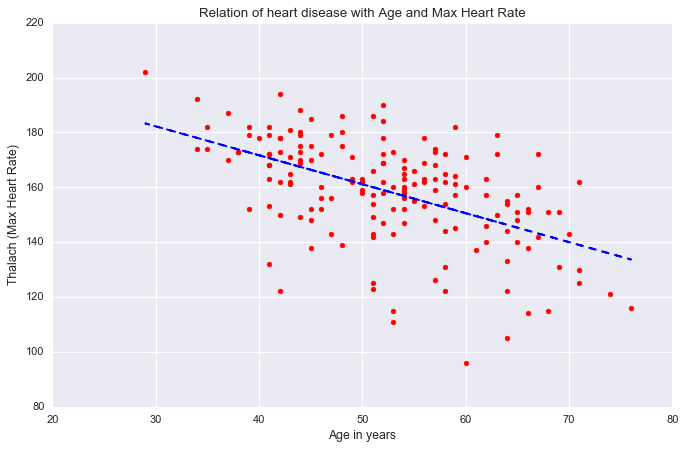

In [139]:
#Scatter graph with only people that have heart disease
plt.figure(figsize=(10,6))
x = plt.scatter(df.age[df.target == 1],df.thalach[df.target == 1],color="red")
plt.xlabel("Age in years")
plt.ylabel("Thalach (Max Heart Rate)")
plt.title("Relation of heart disease with Age and Max Heart Rate");

#Plot a trendline using polyfit
z = np.polyfit(df.age[df.target == 1],df.thalach[df.target == 1],1)
p = np.poly1d(z)
plt.plot(df.age[df.target == 1],p(df.age[df.target == 1]),"b--");

The above graph shows a fairly strong correlation. What can be seen is that as the age rises, the maximum heart rate decreases in patients with heart disease.

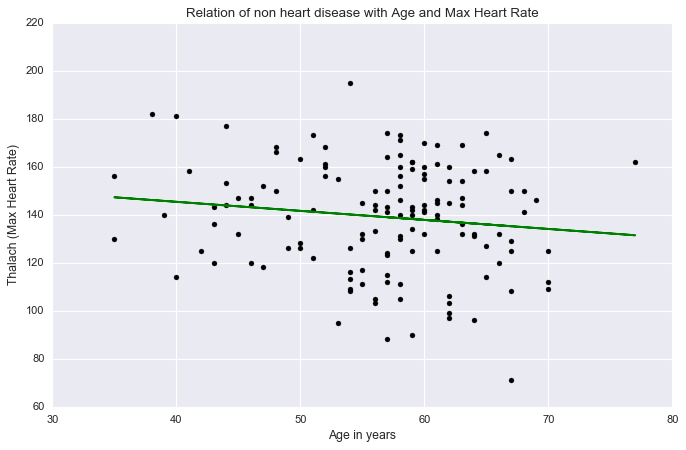

In [140]:
#Scatter graph with only people that do not have heart disease
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
x = plt.scatter(df.age[df.target == 0],df.thalach[df.target == 0],color="black")
plt.xlabel("Age in years")
plt.ylabel("Thalach (Max Heart Rate)")
plt.title("Relation of non heart disease with Age and Max Heart Rate");

#Plot a trendline using polyfit
z = np.polyfit(df.age[df.target == 0],df.thalach[df.target == 0],1)
p = np.poly1d(z)
plt.plot(df.age[df.target == 0],p(df.age[df.target == 0]),"g");

A pattern that can be noticed is that patients with heart disease had a larger decrease in max heart rate as opposed to those
that did not. There is a lower gradient value for those without heart disease. 

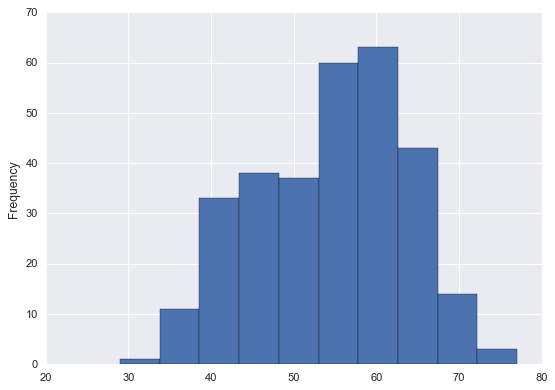

In [141]:
#Check the distribution of age column with a histogram
df.age.plot(kind="hist");

### Correlation Matrix to find relationship between different columns

In [142]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


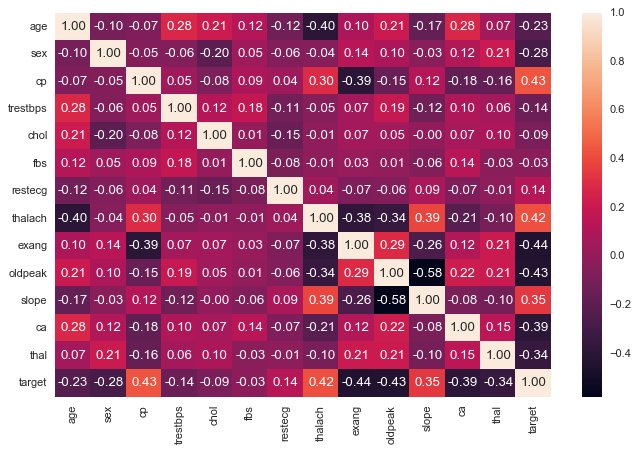

In [143]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(correlation,annot=True,fmt=".2f")

From the above heatmap, what can be concluded is that the main factors that seem to affect the target column, i.e whether or not someone has heart disease, are:
* chest pain type
* thalach
* exang
* oldpeak
* ca

I have set the minimum correlation strength to be 0.4 to be classified as an effecting factor.

### Relationship between Exang and Heart Disease

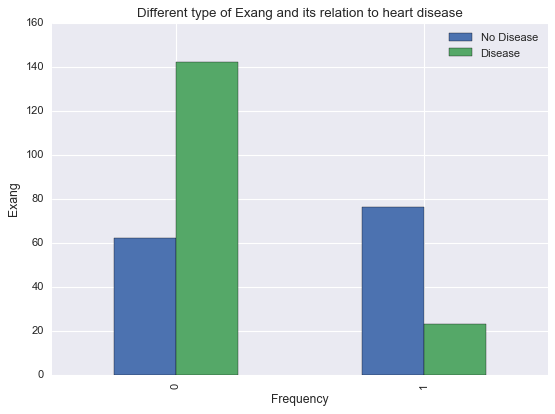

In [144]:
pd.crosstab(df.exang,df.target).plot(kind="bar");
plt.xlabel("Frequency")
plt.ylabel("Exang");
plt.legend(["No Disease","Disease"])
plt.title("Different type of Exang and its relation to heart disease");

Clearly, what can be seen is that if a person has exercise induced agina (Exang) they are more likely to have heart disease.

## 5. Modelling

In order to model the data, the data will need to be split into training and test sets. The training set will be used to help the ML model learn and find patterns between the features/labels and the target column. The test set will be used to check whether our ML model meets our required accuracy of 95%.

In [145]:
#Split data into X and Y

#Medical Attributes without the target column
X = df.drop("target",axis=1)

#Target column only
Y = df["target"]

In [146]:
#Set random seed to 42 in order to make results reproducible
np.random.seed(42)

#Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)#Use 80% of the data for training set

In [147]:
#Check the shapes of the data
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

Shape is correct as X data has 13 columns and 80% of the records is 242. Number of columns for Y is 1 as it uses only the target column, the number of rows are equal between the training and test sets.

Now that the data is split up into training and test sets, its now time to pick a suitable ML model for our classification problem. Using the ML map that is available on sklearn website the following models would be suitable:

1) Logistic Regression

2) K-Nearest Neighbors Classifier

3) Random Forest Classifier

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Since we are using 3 models, place them in a dictionary
models = {"LogisticR": LogisticRegression(),"KNN":KNeighborsClassifier(),"RFC": RandomForestClassifier()}

#Now we are going to fit and score all our models
model_scores = {}

np.random.seed(42)

for name,models in models.items():
    models.fit(X_train,Y_train)
    model_scores[name] = models.score(X_test,Y_test)
    
print(model_scores)

C:\Users\Hemil\Desktop\project_heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticR': 0.8852459016393442, 'KNN': 0.6885245901639344, 'RFC': 0.8360655737704918}


### Model Comparison

Text(0.5, 1.0, 'Model Comparison of test data')

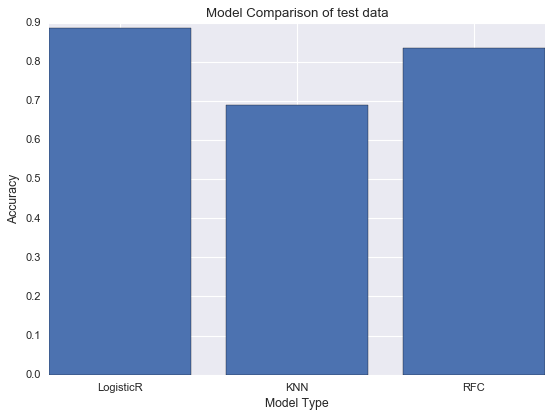

In [149]:
plt.bar(model_scores.keys(),model_scores.values())
plt.xlabel("Model Type")
plt.ylabel("Accuracy");
plt.title("Model Comparison of test data")

Here are the baseline models, now the aim is to improve the accuracy score via:
    * hyperparameter tuning
    * feature importance
    * cross validation
    * precision
    * f1 score
    * classification report
    * ROC Curve
    * Area under ROC curve

### Hyperparameter Tuning

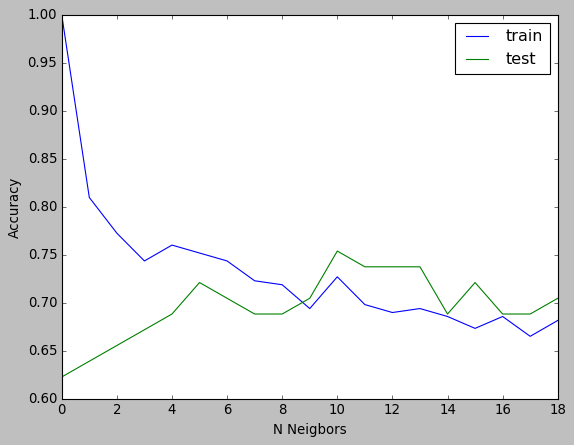

In [151]:
#Start off with tuning KNN

#Parameters of KNN include: {number of neigbors // weights // algorithm // leaf size // power parameter for Minkowski metric}

train_scores = []

test_scores = []

average_scores = []

#Create a list of different values for N-Neighbors
num_of_neigh = list(np.arange(1,20,1))

#Setup another KNN instance
knn = KNeighborsClassifier()

#Loop through N Neighbors to check the optimal choice

for N in num_of_neigh:
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))
    
#Show data via a graph
plt.style.use("classic")
plt.plot(train_scores)
plt.plot(test_scores)
plt.legend(["train","test"])
plt.xlabel("N Neigbors")
plt.ylabel("Accuracy");


The value of N neighbors at 10 produced the highest test set results. Lets try to tune one more hyperparameter, namely leaf size.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Text(0, 0.5, 'Accuracy')

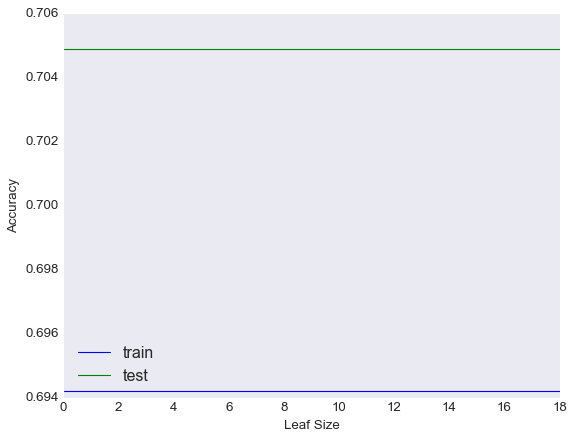

In [152]:
#Use the hyperparameter of N Neighbor set at 10 and try to vary leaf size now
train_scores = []
test_scores = []

leafSize = list(np.arange(1,20,1))

#Loop through N Neighbors to check the optimal choice

print(leafSize)

for N in leafSize:
    knn = KNeighborsClassifier(n_neighbors=10,leaf_size=N)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))
    
#Show data via a graph
plt.style.use("seaborn-dark")
plt.plot(train_scores)
plt.plot(test_scores)
plt.legend(["train","test"],loc="best")
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")

Tuning the leaf size from 1 to 19 has clearly had no effect on the accuracy of the model.

After tuning 2 hyperparameters, the highest score we have managed to reach is around 75% on our test set, this means using K Neighbors Classifier is not suitable for the ML model as it does not reach close to the scores produced by the other 2 models.
This also means that there is no point in using GridSearchCV or RandomisedSearchCV in order to find better parameters as it is unlikely to beat the score of the other 2 models.

### Hyperparameter Tuning with RandomSearchCV

We will be tuning the remaining 2 models with RandomSearchCV:
* LogisticRegression
* RandomForestClassification

In [10]:
#First create a hyperparameter grid in order to perform the randomised search

logistic_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}
"""
Solver has been set to liblinear as it is good for small datasets according to the documentation. Further testing can be done
later to check this statement.

Parameters of Logistic Regression includes {C // class_weight // solver // verbose}

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html - for remaining parameters
""";

In [11]:
from sklearn.model_selection import RandomizedSearchCV
#Tune LogisticRegression model
np.random.seed(42)

#setup random hyperparameter search for LR
log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=logistic_grid,cv=5,n_iter=20,verbose=True)

#Fit random hyperparameter search model for LR
log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [12]:
log_reg.best_params_#Finds the best parameter

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [13]:
log_reg.score(X_test,Y_test)#No difference to the score, only test 2 hyperparameters

0.8852459016393442

Now that we have tuned hyperparameters on the logistic regression model, it is time to try the Random Forest Classifier model

### GridSearchCV on Random Forest Classifier model

In [28]:
#Now create a hyperparameter grid for random forest classifier
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

rfc_grid = {"n_estimators":[100,500,1000],
           "max_depth":[None,2,4],
           "min_samples_split":[2,4,6],
           "min_samples_leaf":[5,7,9]}

"""
Parameters of Random Forest Classifier includes {n_estimators // max_depth // min_samples_split // min_samples_leaf}

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html - Refer to this for the
remaining parameters

""";

In [30]:
#Setup random seed
np.random.seed(42)

rfc_improved = GridSearchCV(RandomForestClassifier(),param_grid=rfc_grid,cv=5,verbose=True)

rfc_improved.fit(X_train,Y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  7.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [31]:
#Find the best parameters
rfc_improved.best_params_

{'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 500}

In [32]:
rfc_improved.score(X_train,Y_train)

0.8636363636363636

In [33]:
model_scores

{'LogisticR': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RFC': 0.8360655737704918}

Clearly there has been in an improvement in the random forest classification model from 83.6% to 86.3%. However even with these changes the model seems to still be behind the logistic regression which actually still has not been tuned, currently at an accuracy of 88.5%.

### Evaluating the improved machine learning model using more metrics:
* ROC curve
* Confusion Matrix
* Classification report
* Recall Score
* F1 Score


In [34]:
#Predictions with the tuned model
y_preds = log_reg.predict(X_test)

In [37]:
y_preds == Y_test

179     True
228    False
111     True
246     True
60      True
       ...  
249     True
104     True
300     True
193     True
184     True
Name: target, Length: 61, dtype: bool

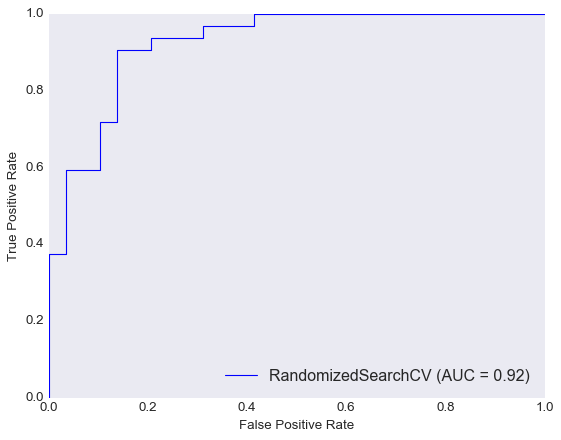

In [44]:
#Plot a roc curve
from sklearn.metrics import roc_curve
data = roc_curve(Y_test,y_preds)
#returns tpr, fpr and thresholds
#tpr = true positive rate
#fpr = false postive rate

plot_roc_curve(log_reg, X_test, Y_test);#Built in function by the system

In [45]:
#Confusion Matrix
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


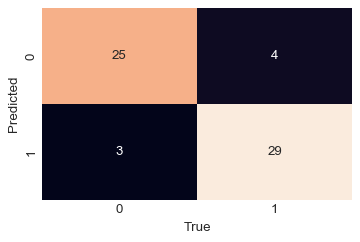

In [56]:
#Improve the look
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,3))
ax = (sns.heatmap(confusion_matrix(Y_test,y_preds),annot=True, cbar=False))
plt.xlabel("True");
plt.ylabel("Predicted");

In [57]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Above data is only on one test split but recalculate them using cross validation

In [71]:
#New classifier with best parameters
model = LogisticRegression(solver = 'liblinear', C= 0.23357214690901212)
accuracy = cross_val_score(model, X, Y,scoring="accuracy").mean()# Cross validated accuracy score
print(accuracy)

0.8479781420765027


In [72]:
# CV Precision
precision = cross_val_score(model, X, Y,scoring="precision").mean()
print(precision)

0.8215873015873015


In [73]:
#CV Recall
recall = cross_val_score(model, X, Y,scoring="recall").mean()
print(recall)

0.9272727272727274


In [75]:
#CV F1-score
f1 = cross_val_score(model, X, Y,scoring="f1").mean()
print(f1)

0.8705403543192143


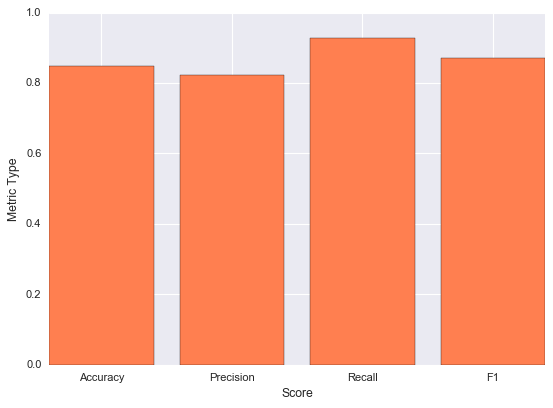

In [85]:
metrics_collection = {"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1":f1}
plt.style.use("seaborn")
plt.bar(metrics_collection.keys(),metrics_collection.values(),color="coral");
plt.xlabel("Score")
plt.ylabel("Metric Type");

### Feature Importance

Now we shall see which features actually contributed to the outcomes of the model. 

In [104]:
model.fit(X_train,Y_train)
model.coef_.shape

(1, 13)

In [106]:
combined = dict(zip(list(df.columns),list(model.coef_[0])))

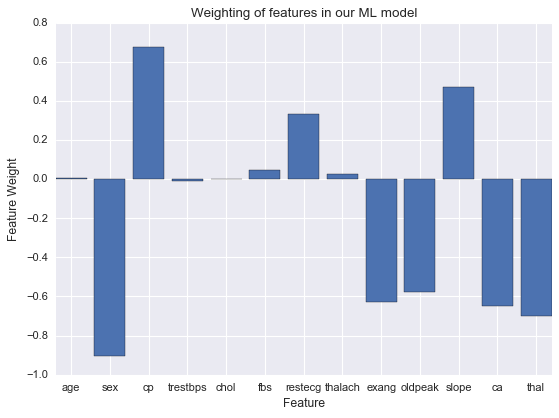

In [112]:
plt.bar(combined.keys(),combined.values());
plt.xlabel("Feature")
plt.ylabel("Feature Weight")
plt.title("Weighting of features in our ML model");

In [115]:
#Check ourselves
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [116]:
#Check slope
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


As shown in the crosstab, as the slope increases, the number of people with heart disease also increase, hence the negative coefficient

## 6. Experimentation

Conclusively, our ML model has only hit a maximum accuracy score of 88.5% which means that the required standard of 95% has yet not been met. We have covered 3 of the main models for classification only in the Sci-Kit Learn ML map. Some ways that we could meet the requirements of 95% is:

* Tune more hyperparameters via further testing
* Find a better ML model that is not necessarily stated on the sci-kit website like CatBoost or XGBoost
* Collect more data

As only a few hyperparameters have actually been tuned on the 2 main models, logistic regression and random forest classifier, further tuning may be a suitable stance in the future. One thing that we could also notice is that certain tuners did not actually effect our logistic regression model, which essentially seemed stuck on our score of 88% on the base parameters. It may be suitable to try and tune the random forest classifier to try and reach the goal of 95% and beyond as improvements were made on that model of around 3% from 83% to 86% by tuning only 4 hyperparameters on the GridSearchCV. I had to limit the size of the hyperparameters in number due to the lack of computational power. Using the ML model and earlier patterns suggest that the main cause of heart disease are as follows, beneath that there is the data dictionary for these features:

* Sex - Being a female makes you more likely to have heart disease
* CP - Having a higher type of chest pain makes you more likely to have heart disease
* Restecg - Having a higher resting electrocardiogram value, i.e. hearth rhythm and electrical activity, leads to a higher chance of having heart disease. This feature has a weaker correlation.
* Exang - Not having exercise induced angina means you are more likely to have heart disease.
* Oldpeak - Having a lower value of this feature means you are more likely to have heart disease
* Slope - Having a higher value of slope increases the chances of heart disease
* CA - Having less major vessels increases the chances of heart disease
* Thal - Having a lower value for Thal indicates an increased chance of heart disease

> Data Dictionary for "important" features:
    1. age: age in years
    2.cp: chest pain type
     * Value 1: typical angina
     * Value 2: atypical angina
     * Value 3: non-anginal pain
     * Value 4: asymptomatic
    3.restecg: resting electrocardiographic results
     * Value 0: normal
     * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    4. exang: exercise induced angina (1 = yes; 0 = no)
    5. oldpeak = ST depression induced by exercise relative to rest
    6. slope: the slope of the peak exercise ST segment
     * Value 1: upsloping
     * Value 2: flat
     * Value 3: downsloping
    7. ca: number of major vessels (0-3) colored by flourosopy
    8. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
  
  
#### Project Heart Disease
#### 10/08/2020
#### By: Hemil Shah 

In [154]:
import os

os.system("jupyter nbconvert --to html heart-disease-classification.ipynb")

0